In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
import skvideo.io
import cv2
from scipy import ndimage

In [26]:
#Change current working directory
imagePath = "C:/Users/antonkout/Documents/Publications/paper/synchronized/new"
os.chdir(imagePath)

In [27]:
exec(open("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/helpers.py").read()) 

In [28]:
rgb_mix1_sync = skvideo.io.vread("./rgb_mix1_sync.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_mix1_sync = skvideo.io.vread("./thermal_mix1_sync.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [5]:
def background_sub_GSOC(in_vid, out_vid, par):
    cap = cv2.VideoCapture(in_vid)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    subtractor = cv2.bgsegm.createBackgroundSubtractorGSOC(replaceRate = par,nSamples =5, hitsThreshold = 15, alpha = 0.01)
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)

    while True:
        _, frame = cap.read()

        if _ == True:
            mask = subtractor.apply(frame)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
            out.write(mask)
        else:
            break

        if  cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [6]:
####GSOC Background Subtraction####

In [174]:
#RGB
in_vid = './rgb_mix1_sync.mp4'
out_vid = "./GSOC/rgb_mix1_gsoc2.mp4"
par= 1
background_sub_GSOC(in_vid, out_vid, par)
#Thermal
in_vid = './thermal_mix1_sync.mp4'
out_vid = "./GSOC/thermal_mix1_gsoc2.mp4"
background_sub_GSOC(in_vid, out_vid, par)

In [29]:
thermal_mix1_gsoc = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/thermal_mix1_gsoc.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
rgb_mix1_gsoc = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/rgb_mix1_gsoc.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

rgb_mix1_gsoc2 = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/rgb_mix1_gsoc2.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_mix1_gsoc2 = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/thermal_mix1_gsoc2.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [30]:
for k in range(thermal_mix1_gsoc.shape[0]):
    thermal_mix1_gsoc[k] = np.sign(cv2.threshold(thermal_mix1_gsoc[k],100,255,cv2.THRESH_BINARY)[1])    
    rgb_mix1_gsoc[k] = np.sign(cv2.threshold(rgb_mix1_gsoc[k],100,255,cv2.THRESH_BINARY)[1])
    thermal_mix1_gsoc2[k] = np.sign(cv2.threshold(thermal_mix1_gsoc2[k],100,255,cv2.THRESH_BINARY)[1]) 
    rgb_mix1_gsoc2[k] = np.sign(cv2.threshold(rgb_mix1_gsoc2[k],100,255,cv2.THRESH_BINARY)[1])

In [32]:
background = np.zeros(shape=thermal_mix1_gsoc.shape)
for k in range(thermal_mix1_gsoc.shape[0]):
    background[k] = thermal_mix1_gsoc2[k] + rgb_mix1_gsoc2[k] + rgb_mix1_gsoc[k]
    background[k] = np.where(background[k]>1, 1, background[k])

In [34]:
gas = np.zeros(shape=thermal_mix1_gsoc.shape)
for k in range(thermal_mix1_gsoc.shape[0]):
    gas[k] = thermal_mix1_gsoc[k]
    gas[k] = np.where(gas[k]>1, 1, gas[k])

In [35]:
gas_detect = np.zeros(shape=thermal_mix1_gsoc.shape)
for k in range(thermal_mix1_gsoc.shape[0]):
    gas_detect[k] = gas[k] - background[k]
    gas_detect[k] = np.where(gas_detect[k]==1, 255, gas_detect[k])
    gas_detect[k] = np.where(gas_detect[k]==(-1), 0, gas_detect[k])

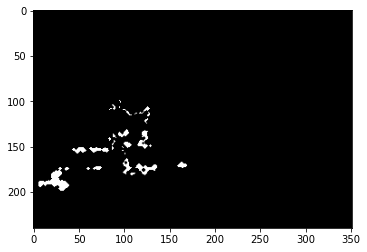

In [36]:
plt.imshow(gas_detect[140],cmap='gray')

In [37]:
skvideo.io.vwrite("./CNT/gas_detect2.mp4", gas_detect)